# 线性回归模型预测血糖数据

In [1]:
# 导入包
import scipy.io as scio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 读取数据

数据格式为mat文件，其中`PPP`标签为和血糖相关的系数，暂时不明了具体是哪些系数，而`TTT`则是表示着对应的血糖，提取的数据如下所示，数据量较小，仅有205组数据。这个数据量，做神经网络感觉没多大必要，先尝试用简单的线性回归尝试一下

In [2]:
file_name = "data.mat"
data = scio.loadmat(file_name)
X = data.get("PPP")
X = X.T
y = data.get("TTT")
y = y[0]

In [3]:
# 确认X和y数据第一维一致
print("X.shape :", X.shape, " y.shape: ", y.shape)

X.shape : (205, 4)  y.shape:  (205,)


In [4]:
type(X)

numpy.ndarray

In [5]:
type(y)

numpy.ndarray

In [6]:
X[1:10,:]

array([[ 1.04333333e+02,  5.80000000e+01,  3.32000000e+01,
        -6.43337135e-01],
       [ 9.50000000e+01,  7.30000000e+01,  3.55000000e+01,
         9.59860109e-02],
       [ 9.40000000e+01,  7.10000000e+01,  3.51000000e+01,
         3.01645487e-01],
       [ 1.03000000e+02,  6.73333333e+01,  3.64666667e+01,
        -4.38108606e-02],
       [ 9.30000000e+01,  6.90000000e+01,  3.64333333e+01,
        -6.66146153e-01],
       [ 1.00000000e+02,  8.10000000e+01,  3.50000000e+01,
         1.00000000e+00],
       [ 8.70000000e+01,  5.60000000e+01,  3.50000000e+01,
         3.18300837e-01],
       [ 8.76666667e+01,  7.53333333e+01,  3.65000000e+01,
         2.24809194e-01],
       [ 9.73333333e+01,  6.96666667e+01,  3.38333333e+01,
        -4.51109746e-01]])

In [7]:
y[1:10]

array([6.6, 9.1, 5.1, 5.3, 4.6, 6.3, 8.1, 4.7, 5.2])

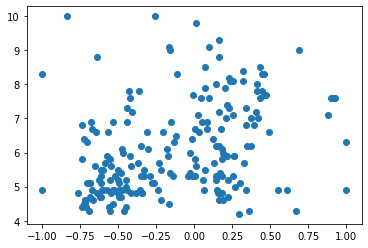

In [8]:
plt.scatter(X[:,3],y)
plt.show()

## 创建测试集

再确认数据格式无误后，可以将数据集分为训练数据集和测试数据集

>说实话，真没看出来这个`PPP`和`TTT`有啥联系，先尝试一下吧

In [30]:
# 根据比例划分数据集为训练集和测试集
def split_train_test(X, y, test_ratio):
    shuffled_indices = np.random.permutation(len(y))
    test_set_size = int(len(y) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices,:], y[train_indices], X[test_indices,:], y[test_indices]

In [31]:
# 分割得到训练集和测试集
train_X, train_y, test_X, test_y = split_train_test(X, y, 0.4)

In [34]:
train_X.shape, train_y.shape,test_X.shape, test_y.shape

((123, 4), (123,), (82, 4), (82,))

## 训练数据集

这里选择简单的线性回归模型，采用梯度下降的方法训练数据

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

LinearRegression()

以上就是简单的线性回归训练，从原始数据中，随机挑选几个数据检验模型的预测效果

In [63]:
some_data = X[120:125]
some_labels = y[120:125]
print('Predictions:', lin_reg.predict(some_data))

Predictions: [6.16550115 6.25891966 5.47276013 7.38280052 5.2230065 ]


In [64]:
print("Labels:",list(some_labels))

Labels: [4.5, 4.2, 4.8, 8.1, 4.3]


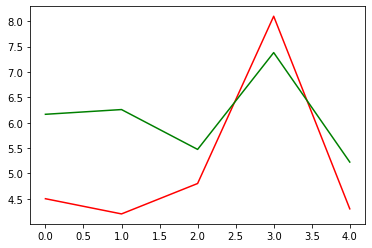

In [65]:
plt.plot(range(5), some_labels, c='r')
plt.plot(range(5), lin_reg.predict(some_data), c='g')
plt.show()

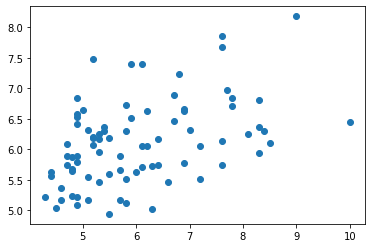

In [46]:
predict_y = lin_reg.predict(test_X)
plt.scatter(test_y,predict_y)
plt.show()

In [165]:
# clarke网格误差分析
def clarke(y,y_predicted):
    """
    clarke网格分析

    total, percentage = clarke(y, yp)
    
    INPUTS:
    y       Reference values(血糖浓度参考值)
    yp      Predicted/estimated values(血糖预测值)
    
    OUTPUTS:

    """
    # 设置坐标轴范围和坐标轴名称
    plt.xlim(0, 400*0.0556)
    plt.ylim(0, 400*0.0556)
    plt.xlabel('Reference values of Blood Glucose(mmol/L)')
    plt.ylabel('Predicted values of Blood Glucose(mmol/L)')
    # 获取数据长度
    n = len(y)
    # 散点图绘制数据
    plt.scatter(y, y_predicted, s=15)
    # 绘制网线
    # 上半区网线
    plt.plot([0,400*0.0556],[0,400*0.0556],linestyle=':',c='k') 
    plt.plot([0,175*0.0556/3],[70*0.0556,70*0.0556],c='k',linewidth=1)
    plt.plot([175*0.0556/3,400*0.0556/1.2],[70*0.0556,400*0.0556],c='k',linewidth=1)
    plt.plot([70*0.0556,70*0.0556],[84*0.0556,400*0.0556],c='k', linewidth=1)
    plt.plot([0,70*0.0556],[180*0.0556,180*0.0556],c='k',linewidth=1)
    plt.plot([70*0.0556,290*0.0556],[180*0.0556,400*0.0556],c='k', linewidth=1)
    # 下半区网线绘制
    plt.plot([70*0.0556,70*0.0556],[0,56*0.0556],c='k',linewidth=1)
    plt.plot([70*0.0556,400*0.0556],[56*0.0556,320*0.0556],c='k',linewidth=1)
    plt.plot([180*0.0556,180*0.0556],[0,70*0.0556],c='k',linewidth=1)
    plt.plot([180*0.0556,400*0.0556],[70*0.0556,70*0.0556],c='k',linewidth=1)
    plt.plot([240*0.0556,240*0.0556],[70*0.0556,180*0.0556],c='k',linewidth=1)
    plt.plot([240*0.0556,400*0.0556],[180*0.0556,180*0.0556],c='k',linewidth=1)
    plt.plot([130*0.0556,180*0.0556],[0,70*0.0556],c='k',linewidth=1)
    
    # 绘制区域标签A,B,C,D,E
    plt.text(30*0.0556,20*0.0556,'A',fontsize=9);
    plt.text(30*0.0556,150*0.0556,'D',fontsize=9);
    plt.text(30*0.0556,380*0.0556,'E',fontsize=9);
    plt.text(150*0.0556,380*0.0556,'C',fontsize=9);
    plt.text(160*0.0556,20*0.0556,'C',fontsize=9);
    plt.text(380*0.0556,20*0.0556,'E',fontsize=9);
    plt.text(380*0.0556,120*0.0556,'D',fontsize=9);
    plt.text(380*0.0556,260*0.0556,'B',fontsize=9);
    plt.text(280*0.0556,380*0.0556,'B',fontsize=9);

    # 计算数据
    total = np.zeros(5)
    # A区域
    for i in range(0,n):
        if (y[i] <= 70*0.0556 and y_predicted[i] <= 70*0.0556) or (y_predicted[i] <= 1.2*y[i] and y_predicted[i] >= 0.8*y[i]): 
            total[0] = total[0] + 1
        else:
            # E区域
            if(y[i] >= 180*0.0556 and y_predicted[i] <= 70*0.0556) or (y[i] <= 70*0.0556 and y_predicted[i] >= 180*0.0556):
                total[4] = total[4] + 1
            else:
                # 区域C
                if (y[i] >= 70*0.0556 and y[i] <= 290*0.0556) and (y_predicted[i] >= y[i] + 110*0.0556) or (y[i] >= 130*0.0556 and y[i] <= 180*0.0556) and (y_predicted[i] <= (7/5)*y[i] - 182*0.0556):
                    total[2] = total[2] + 1
                else:
                    # 区域D
                    if (y[i] >= 240*0.0556) and (y_predicted[i] >= 70*0.0556) and (y_predicted[i] <= 180*0.0556) or (y[i] <= 175*0.0556/3 and y_predicted[i] <= 180*0.0556) and (y_predicted[i] >= 70*0.0556) or (y[i] >= 175*0.0556/3 and y[i] <= 70*0.0556) and (y_predicted[i] >= (6/5)*y[i]):
                        total[3] = total[3] + 1
                    else:
                        # 区域B
                        total[1] = total[1] + 1

    percentage = (total/n)*100
    plt.show()
    return total, percentage

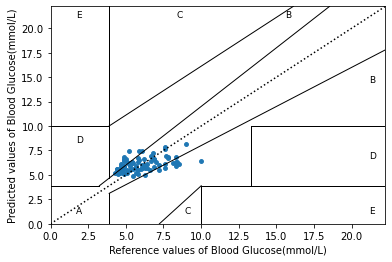

In [166]:
total, percentage = clarke(test_y, predict_y)

In [167]:
total

array([56., 26.,  0.,  0.,  0.])

数据点基本落入克拉克网络A,B区域，但是在B区域的点有点过多，准确率不是很高

In [172]:
percentage

array([68.29268293, 31.70731707,  0.        ,  0.        ,  0.        ])